# Falta el Csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

meses = ["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", "JULIO", "AGOSTO", "SEPTIEMBRE", "OCTUBRE", "NOVIEMBRE", "DICIEMBRE"]
mesesn = [i+1 for i in range(12)]
filename = "../Archivos/precio_de_la_luz.csv"
df = pd.read_csv(filename, sep=";")
# , 
#                parse_dates=[ "Date" ],
#                usecols=[ "Date" , "Open" , "Volume" ],
#                index_col= "Date" 
#                decimal=','

df["dia"] = df["Periodo"].str.split(" ", expand=True)[1]
df["mes"] = df["Periodo"].str.split(" ", expand=True)[3]
df = df.dropna()
df["mes_num"] = df["mes"].str.upper().replace(meses, mesesn).astype(int)
df['precio'] = df['Precio de la luz'].str.replace(",", ".")
df['precio'] =df['precio'].astype(float)

df.index = pd.to_datetime({"year":df["Año"], "month":df["mes_num"], "day":df["dia"]})

min_date = datetime.datetime(year=2022, month=1, day=1)
max_date = datetime.datetime(year=2022, month=12, day=31)

df = df.loc[df.index >= min_date]
df = df.loc[df.index <= max_date]
df
#df.describe()
#df.info()
#df.shape

FileNotFoundError: [Errno 2] No such file or directory: '../Archivos/precio_de_la_luz.csv'

In [ ]:
df2 = df[["precio"]]

df2= df2.rolling("7d").mean()
df2


,precio
2022-01-02,136.970000
2022-01-03,143.735000
2022-01-04,146.646667
2022-01-05,155.232500
2022-01-06,166.782000
...,...
2022-12-27,53.845714
2022-12-28,50.605714
2022-12-29,45.485714
2022-12-30,43.154286


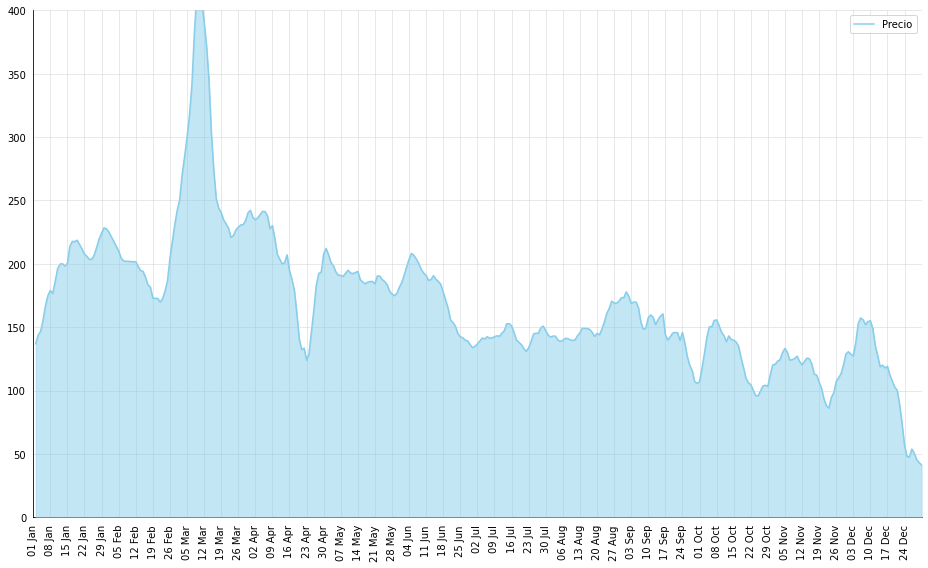

In [ ]:
from datetime import datetime
from datetime import timedelta

fig, ax = plt.subplots(figsize=(13, 8)) 
# Alias para facilitar el acceso
x = df2.index
y = df2["precio"]

# Líneas de evolución
ax.plot(x, y, label= "Precio" , color= "skyblue" , linewidth=1.5)

# Relleno del área
plt.fill_between(x, y, alpha=0.5, color= "skyblue" , zorder=3)

# Formateo de los ejes
ax.xaxis.set_ticks_position( "none" )
ax.yaxis.set_ticks_position( "none" )
y_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450]
y_tick_labels = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(0, 400)

min_date = datetime(year=2022, month=1, day=1)
max_date = datetime(year=2022, month=12, day=31)

x_ticks = [min_date + timedelta(days=d*7) for d in range(52)]
ax.set_xticks(x_ticks)
x_tickslabels = [d.strftime("%d %b") for d in x_ticks]
ax.set_xticklabels(x_tickslabels, rotation=90)
ax.set_xlim(min_date, max_date)


# Rejilla
ax.xaxis.grid(color= "lightgray" , linewidth=.5)
for y_tick in y_ticks:
  if y_tick != 0:
    ax.axhline(y_tick, color= "lightgray" , linewidth=.5)
ax.legend()

ax.spines["right"].set_visible(False) # ocultar borde derecho
ax.spines["top"].set_visible(False) # ocultar borde superior
fig.tight_layout()